## Practica 2 Statistical Learning 2
Ruben Gonzalez

-Instrucciones:

Usando el dataset de fashion MNIST realizar:
* PCA sin sklearn para reducir a 2 dimensiones.
    * Anotar la cantidad de varianza preservada.
* t-sne con sklearn para reducir a 2 dimensiones.
* Analizar ambas representaciones, comparar y concluir.
* Aplicar clustering con sklearn sobre la representación reducida. 
* Ya que este dataset si posee etiquetas “y” (razas) analizar si los clusters encontrados tienden a agrupar la misma prenda o prendas similares.
* Agregar conclusiones finales. 


In [32]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt
import datetime
import pandas as pd
from sklearn.cluster import KMeans

## Cargamos la data 

El dataset Fashion-MNIST cotiene 60,000 imagenes para el set de datos de entrenamiento y un set de datos de prueba de 10,000.

In [3]:
fashion_mnist = keras.datasets.fashion_mnist

In [4]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

## Imagenes
Las imagenes son Numpy Arrays de 28x28, los pixeles estan entre los valores de 0 a 255

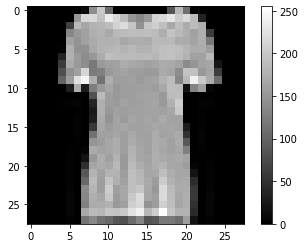

In [5]:
plt.imshow(train_images[10], cmap = 'gray')
plt.colorbar()

## Labels

In [6]:
np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

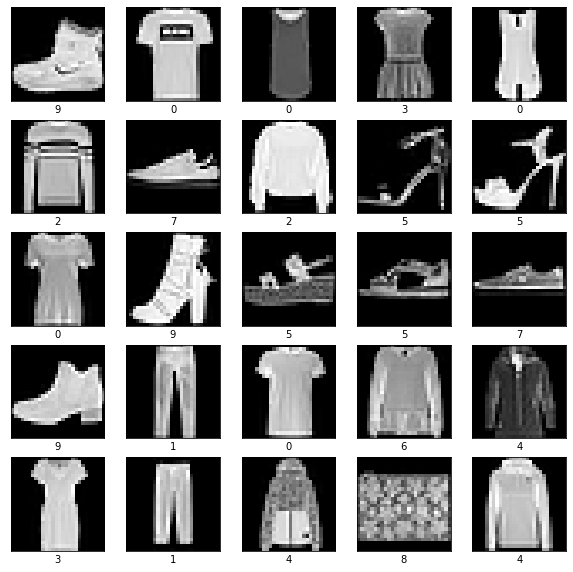

In [7]:
plt.figure(figsize=(10,10))

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap='gray')
    plt.xlabel(train_labels[i])
plt.show()

## Implementacion PCA sin Skitlearn

In [8]:
#---Metodo para cambiar el shape de nuestra entrada para tener solamente 2 dimensiones
def reshapeImages(ImagesFeatures):
    first=ImagesFeatures.shape[1]
    second=ImagesFeatures.shape[2]
    return ImagesFeatures.reshape(ImagesFeatures.shape[0],first*second)

In [9]:
X_train_images= reshapeImages(train_images)

In [10]:
X_train_images.shape

(60000, 784)

In [12]:
def AplicarPCA(data):
    #--- Normalizar los datos
    from sklearn.preprocessing import StandardScaler
    X_std = StandardScaler().fit_transform(data)

    #---Calculo de covarianza, eigenvectores y eigenvalores
    cov_mat = np.cov(X_std.T)
    eig_vals, eig_vecs = np.linalg.eig(cov_mat)

    #--Usar en el calculo de varianza preservada
    Total=np.sum(eig_vals)

    #--Hace una lista de tuplas (eigenvalue, eigenvector)
    eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

    # Orderna por eigen valor de mayor a menor
    eig_pairs.sort()
    eig_pairs.reverse()

    #-- Obtengo la matriz de valores a usar con K=2 y su varianza
    matrix_w = np.hstack((eig_pairs[0][1].reshape(eig_vals.shape[0],1), 
                          eig_pairs[1][1].reshape(eig_vals.shape[0],1)))
    Varianza = eig_pairs[0][0]+eig_pairs[1][0]

    #---Este es el total de la varianza preservada
    PorVarianza=Varianza/Total

    Y = X_std.dot(matrix_w)

    #-- Mostrar representacion en 2d
    plt.scatter(Y[:,0],Y[:,1], color='black')
    plt.show()
    return PorVarianza, Y

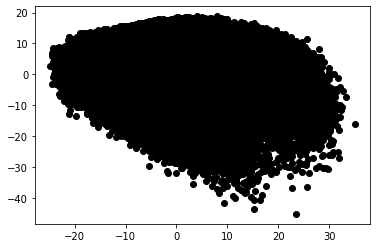

In [13]:
Varianza, Out2dPCA = AplicarPCA(X_train_images)

In [14]:
#--Porcentaje de varianza conservada
Varianza

0.3649817991070225

Se procede a realizar el mismo procesamiento con menos registros para poder realizar una mejor visualizacion

In [43]:
nuevoX=X_train_images[0:10000,:]
nuevoLabel=train_labels[0:10000]

In [22]:
nuevoX.shape

(10000, 784)

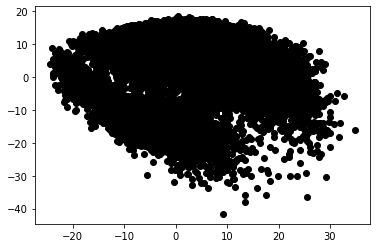

In [23]:
Varianza2, Out2dPCA2 = AplicarPCA(nuevoX)

In [24]:
Varianza2

0.36673718467135513

## t-sne con sklearn
Se usara el dataset nuevoX pues el algoritmo t-sne es menos eficiente con datasets muy grandes

In [26]:
from sklearn.manifold import TSNE

In [27]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(nuevoX)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 10000 samples in 4.040s...
[t-SNE] Computed neighbors for 10000 samples in 215.084s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 392.728039
[t-SNE] KL divergence after 250 iterations with early exaggeration: 76.881950
[t-SNE] KL divergence after 300 iterations: 2.549310


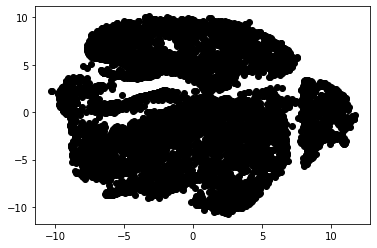

In [29]:
plt.scatter(tsne_results[:,0],tsne_results[:,1], color='black')
plt.show()

#### Analisis y comparacion PCA vs t-SNE
Entre ambas representaciones obtenidas, se puede ver que t-SNE muestra de mejor forma las posibles separaciones entre clusters. Sin embargo por la experimentacion realizada con ambos metodos se puede concluir que t-SNE es computacionalmente muy costoso cuando se tienen demasiadas features.

## Aplicando clustering
Se usara k=10 pues hay 10 labels

In [58]:
def Clusters(k, data):
    kmeans = KMeans(n_clusters = k, init = 'k-means++', random_state = 0)
    y_kmeans = kmeans.fit_predict(data)
    plt.scatter(data[:,0],data[:,1], c=y_kmeans, cmap='Paired')

### Graficando PCA

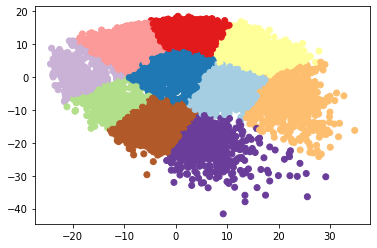

In [59]:
Clusters(10,Out2dPCA2)

### Graficando t-SNE

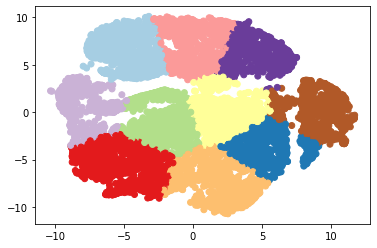

In [60]:
Clusters(10, tsne_results)

## Agrupacion en base a etiquetas

### Graficando PCA

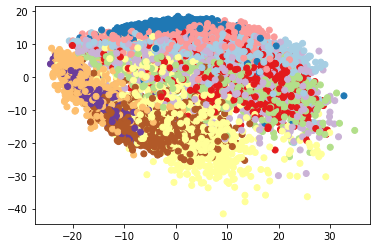

In [61]:
plt.scatter(Out2dPCA2[:,0],Out2dPCA2[:,1], c=nuevoLabel, cmap='Paired')

### Graficando t-SNE

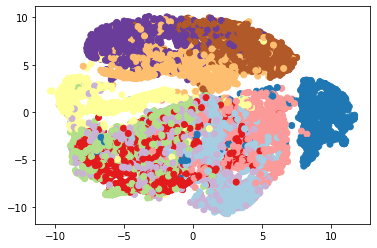

In [62]:
plt.scatter(tsne_results[:,0],tsne_results[:,1], c=nuevoLabel, cmap='Paired')

### Conclusiones finales
Analizando los graficos se concluye que el mejor trabajo lo hizo el algoritmo t-SNE pues el grafico se parece mas entre resultados obtenidos clustering vs labels reales. Quizas se lograria un mejor resultado al realizar mas iteraciones del algoritmo.

Otra conclusion es que los resultados obtenidos de los clusters pueden representar una asociacion distinta a la obtenida en los labels, quizas informacion que no se conoce y que se puede estudiar para encontrar porque se realizo esa asociacion. 